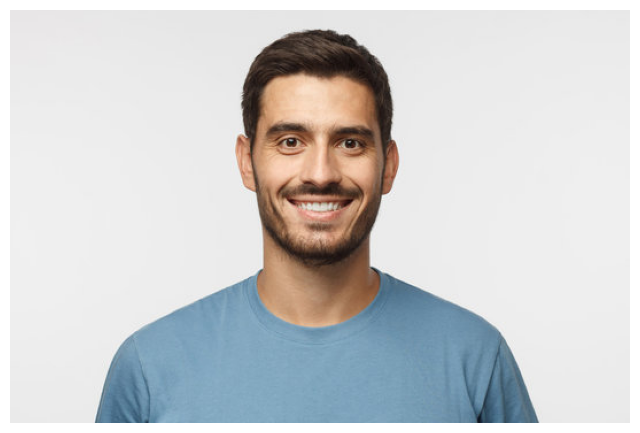

In [1]:
import cv2
import matplotlib.pyplot as plt
import mediapipe
import numpy as np 
import pandas as pd
img = cv2.imread(r"C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\pic1.jpg")
 
fig = plt.figure(figsize = (8, 8))
plt.axis('off')
plt.imshow(img[:, :, ::-1])
plt.show()

In [2]:
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

In [3]:
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
landmarks = results.multi_face_landmarks[0]

In [8]:
data = {'p1': [417, 285, 295, 282, 283, 276, 383, 353, 265, 340, 346, 347, 348, 349, 350, 357, 465],
        'p2': [285, 295, 282, 283, 276, 383, 353, 265, 340, 346, 347, 348, 349, 350, 357, 465, 417]}

df = pd.DataFrame(data)
df

,p1,p2
0,417,285
1,285,295
2,295,282
3,282,283
4,283,276
5,276,383
6,383,353
7,353,265
8,265,340
9,340,346


In [9]:
routes_idx = []
 
p1 = df.iloc[0]["p1"]
p2 = df.iloc[0]["p2"]
 
for i in range(0, df.shape[0]):
     
    #print(p1, p2)
     
    obj = df[df["p1"] == p2]
    p1 = obj["p1"].values[0]
    p2 = obj["p2"].values[0]
     
    route_idx = []
    route_idx.append(p1)
    route_idx.append(p2)
    routes_idx.append(route_idx)
 
# -------------------------------
 
for route_idx in routes_idx:
    print(f"Draw a line between {route_idx[0]}th landmark point to {route_idx[1]}th landmark point")

Draw a line between 285th landmark point to 295th landmark point
Draw a line between 295th landmark point to 282th landmark point
Draw a line between 282th landmark point to 283th landmark point
Draw a line between 283th landmark point to 276th landmark point
Draw a line between 276th landmark point to 383th landmark point
Draw a line between 383th landmark point to 353th landmark point
Draw a line between 353th landmark point to 265th landmark point
Draw a line between 265th landmark point to 340th landmark point
Draw a line between 340th landmark point to 346th landmark point
Draw a line between 346th landmark point to 347th landmark point
Draw a line between 347th landmark point to 348th landmark point
Draw a line between 348th landmark point to 349th landmark point
Draw a line between 349th landmark point to 350th landmark point
Draw a line between 350th landmark point to 357th landmark point
Draw a line between 357th landmark point to 465th landmark point
Draw a line between 465th

In [10]:
routes = []
 
for source_idx, target_idx in routes_idx:
     
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
         
    relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
    relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
 
    #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
     
    routes.append(relative_source)
    routes.append(relative_target)

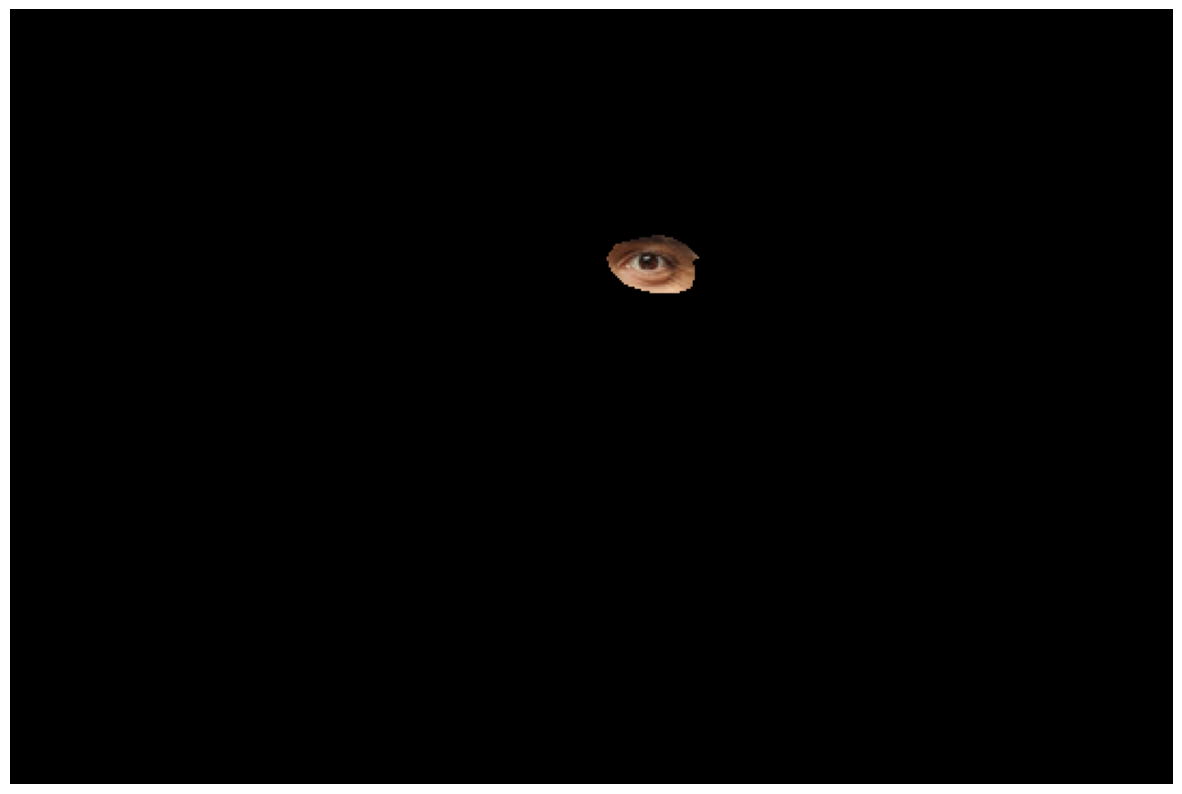

In [11]:
import numpy as np
 
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)
  
out = np.zeros_like(img)
out[mask] = img[mask]
 
fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(out[:, :, ::-1])